---
title: "Lecture 3: Polynomial interpolation, Linear systems"
author: "Jamie Haddock"
format: 
    revealjs:
        output-file: Lecture3_slides
        slide-number: true
        chalkboard: 
            buttons: false
        preview-links: auto
        logo: figs/hmc.png
        css: input/slides.css
        incremental: true
        smaller: true
        code-fold: true
    html: 
        code-fold: true
    pdf:
        documentclass: article
        toc: true
        number-sections: true
        geometry:
          - top=1in
          - left=1in
          - bottom=1in
          - right=1in
format-links: false
jupyter: julia-1.9
filters: 
  - input/remove-pause.lua
execute:
  echo: true
  eval: true
---

# Polynomial Interpolation

Often we encounter data to which we hope to fit a function -- see e.g., most of machine learning!  One of the most fundamental such problems is to find a polynomial function that passes through all data points.  This problem is known as **polynomial interpolation**.

::: {.callout-note icon=false}
## Definition: Polynomial interpolation
Given $n$ points $(t_1, y_1), \cdots, (t_n, y_n)$, where the $t_i$ are all distinct, the **polynomial interpolation** problem is to find a polynomial $p$ of degree less than $n$ such that $p(t_i) = y_i$ for all $i$.
:::

## Interpolation as a linear system

The *polynomial interpolation* problem in the definition above seeks a polynomial of the form $$p(t) = c_1 + c_2 t + c_3 t^2 + \cdots + c_n t^{n-1}$$ such that $y_i = p(t_i)$ for all $i$.  We can rewrite this as

. . .

\begin{align*}
   c_1 & {}+{} &  c_2 t_1 & {}+{} & \cdots & {}+{} & c_{n-1}t_1^{n-2} & {}+{} & c_n t_1^{n-1} & {}={} & y_1 \\
   c_1 & {}+{} &  c_2 t_2 & {}+{} & \cdots & {}+{} & c_{n-1}t_2^{n-2} & {}+{} & c_n t_2^{n-1} & {}={} & y_2 \\
   c_1 & {}+{} &  c_2 t_3 & {}+{} & \cdots & {}+{} & c_{n-1}t_3^{n-2} & {}+{} & c_n t_3^{n-1} & {}={} & y_3 \\
    & {}{} &   & {}{} &  & {}{} &  & {}{} & \vdots & {}{} &  \\
   c_1 & {}+{} &  c_2 t_n & {}+{} & \cdots & {}+{} & c_{n-1}t_n^{n-2} & {}+{} & c_n t_n^{n-1} & {}={} & y_n. \\
\end{align*}

---

These equations can be written succinctly in our usual linear system form

$$\begin{bmatrix} 1 & t_1 & \cdots & t_1^{n-2} & t_1^{n-1} \\ 1 & t_2 & \cdots & t_2^{n-2} & t_2^{n-1} \\ 1 & t_3 & \cdots & t_3^{n-2} & t_3^{n-1} \\ \vdots & \vdots &  & \vdots & \vdots \\ 1 & t_n & \cdots & t_n^{n-2} & t_n^{n-1} \end{bmatrix} \begin{bmatrix} c_1 \\ c_2 \\ c_3 \\ \vdots \\ c_n \end{bmatrix} = \begin{bmatrix} y_1 \\ y_2 \\ y_3 \\ \vdots \\ y_n \end{bmatrix},$$

which we denote $\mathbf{V} \mathbf{c} = \mathbf{y}$.

. . .

This is special type of matrix!

::: {.callout-note icon=false}
## Definition: Vandermonde matrix
Given distinct values $t_1, \cdots, t_n$, a **Vandermonde matrix** for these values is the $n \times n$ matrix appearing above.
:::

---

We begin with an example of data about the population of China.

In [14]:
year = [1982, 2000, 2010, 2015] #years
pop = [1008.18, 1262.64, 1337.82, 1374.62] #population in millions

4-element Vector{Float64}:
 1008.18
 1262.64
 1337.82
 1374.62

In [15]:
t = year .- 1980.0 #indexing years after 1980
y = pop;

In [16]:
V = [t[i]^j for i=1:4, j=0:3]

4×4 Matrix{Float64}:
 1.0   2.0     4.0      8.0
 1.0  20.0   400.0   8000.0
 1.0  30.0   900.0  27000.0
 1.0  35.0  1225.0  42875.0

---

[The expression with a for loop inside brackets is called a **comprehension**.  It si a good way to construct arrays, vectors, and matrices.]{.content-hidden when-format='revealjs' when-format='pptx'} Now we can solve the system $$\mathbf{V}\mathbf{c} = \mathbf{y}.$$

In [17]:
c = V \ y

4-element Vector{Float64}:
 962.2387878787875
  24.127754689754774
  -0.5922620490620537
   0.00684386724386731

In the next couple of weeks, we'll study the algorithms used under the hood when we use the Julia backslash operator.  Even the algorithms solving a simple problem like a linear system are mathematically rich!  

. . .

Let's check out the residual in the system for this solution!

In [18]:
y - V*c

4-element Vector{Float64}:
 0.0
 0.0
 2.2737367544323206e-13
 0.0

---

Remember that this solution contains the coefficients of a polynomial that interpolates these four points!

In [19]:
using Polynomials
p = Polynomial(c)
p(2005-1980)

1302.2043001443

---

[Now, we plot the data and our interpolating polynomial.  First, the scatterplot -- the function `scatter` creates this type of plot.]{.content-hidden when-format='revealjs' when-format='pptx'} 

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`


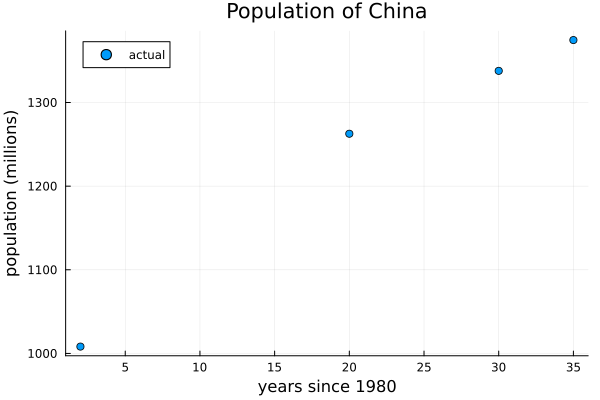

In [20]:
import Pkg; Pkg.add("Plots")
using Plots
scatter(t,y, label="actual", legend=:topleft,
    xlabel="years since 1980", ylabel="population (millions)",
    title="Population of China")

---

To evaluate the polynomial over this interval, we use the *broadcasting* operation `.` to evaluate it at every element of an array of points in the interval.  [The `range` function allows us to create an interval of evenly spaced points.]{.content-hidden when-format='revealjs' when-format='pptx'} 

In [21]:
tt = range(0,35,length=500) #500 times in the interval [0,35]
yy = p.(tt)                 #evaluate the polynomial at all vector elements
foreach(println,yy[1:4])

962.2387878787875
963.9282039963299
965.6118068288089
967.2896105457506


---

[Now, to superimpose the plot of the interpolating polynomial over the top of this plot (rather than replacing it) we use `plot!`.  In general, functions that end with `!` change the value or state of something.]{.content-hidden when-format='revealjs' when-format='pptx'} 

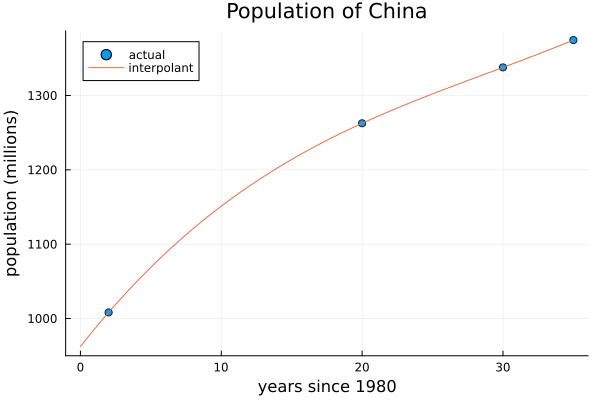

In [22]:
plot!(tt,yy,label="interpolant")

# Computing with Matrices

*Much* of scientific computing is made easier by using and being comfortable with matrices!

## Block matrix expressions

It is often helpful to break a given matrix into smaller, named submatrices.  For instance, we might write that matrix broken into a $2 \times 3$ array of six blocks as $$\begin{bmatrix} \mathbf{A}_{11} & \mathbf{A}_{12} & \mathbf{A}_{13} \\ \mathbf{A}_{21} & \mathbf{A}_{22} & \mathbf{A}_{23} \end{bmatrix}.$$

[It is understood that blocks appearing to the right or left of another have the same number of rows, and blocks appearing directly above or below another have the same number of columns.]{.content-hidden when-format='revealjs' when-format='pptx'} 

. . .

Suppose $B$ is a $3 \times 1$ block-matrix and all products $\mathbf{A}_{ij}\mathbf{B}_j$ exist, then $$\mathbf{A}\mathbf{B} = \begin{bmatrix} \mathbf{A}_{11}\mathbf{B}_1 + \mathbf{A}_{12}\mathbf{B}_2 + \mathbf{A}_{13} \mathbf{B}_3 \\ \mathbf{A}_{21}\mathbf{B}_1 + \mathbf{A}_{22}\mathbf{B}_2 + \mathbf{A}_{23} \mathbf{B}_3 \end{bmatrix}.$$

---

::: {.callout-caution icon=false}
## Exercise: Block matrix transpose
How do you think $\mathbf{A}^\top = \begin{bmatrix} \mathbf{A}_{11} & \mathbf{A}_{12} & \mathbf{A}_{13} \\ \mathbf{A}_{21} & \mathbf{A}_{22} & \mathbf{A}_{23} \end{bmatrix}^\top$ is defined?
:::


<details><summary>Answer: </summary>

Noting the relationship between rows and columns of the matrix $\mathbf{A}$ and the block matrices $\mathbf{A}_{ij}$, we have
$$\mathbf{A}^\top = \begin{bmatrix} \mathbf{A}_{11} & \mathbf{A}_{12} & \mathbf{A}_{13} \\ \mathbf{A}_{21} & \mathbf{A}_{22} & \mathbf{A}_{23} \end{bmatrix}^\top = \begin{bmatrix} \mathbf{A}_{11}^\top & \mathbf{A}_{21}^\top \\ \mathbf{A}_{12}^\top & \mathbf{A}_{22}^\top \\ \mathbf{A}_{13}^\top & \mathbf{A}_{33}^\top \end{bmatrix}.$$

 </details>

## Vectors and matrices in Julia

Once you get the hang of vector and matrix manipulation in Julia, it tends to be fairly straightforward and intuitive.  We'll get started with some practice!

Get on the server at `https://149-165-153-51.js2proxy.cacao.run/` and download our in class playground notebook using `wget "https://raw.githubusercontent.com/jamiehadd/164-ScientificComputing/refs/heads/main/Lecture3/Lecture3_playground.ipynb"`.  Run the included code blocks, understand the output, and note any questions you have!

# Linear Systems

For the next couple of weeks, we will be considering the problem of solving a linear system -- finding $\mathbf{x}$ such that $\mathbf{A}\mathbf{x} = \mathbf{b}$ given a square $n \times n$ matrix $\mathbf{A}$ and $n$-vector $\mathbf{b}$.

. . .

If $\mathbf{A}$ is invertible then the solution to the system is $\mathbf{x} = \mathbf{A}^{-1}\mathbf{b}$ as, in this case, we have $$\mathbf{A}\mathbf{x} = \mathbf{A}\mathbf{A}^{-1} \mathbf{b} = \mathbf{b}.$$

## The Big Lesson

You probably remember the process of calculating inverse matrices from Linear Algebra -- challenging!  It turns out calculating the inverse via numerical computation is also challenging and almost never the best tool at your disposal.

In [60]:
A = randn(10000,10000)
x_true = ones(10000,);
b = A*x_true;

In [64]:
@time x = A\b;

  3.749634 seconds (9 allocations: 763.092 MiB, 0.43% gc time)


In [65]:
@time x = inv(A)*b;

 13.757109 seconds (13 allocations: 767.975 MiB, 0.06% gc time)


. . .

[Mathematically, these operations are equivalent, but *numerically* they are very different!]{.content-hidden when-format='revealjs' when-format='pptx'} 

---

One way to check a computed answer of a linear system is to compute the **residual**.  The entries of the residual should be ideally close to machine precision (relative to the size of the entries in the solution).

In [66]:
A = [1 0 -1; 2 2 1; -1 -3 0]
b = [1,2,3]
x = A\b

3-element Vector{Float64}:
  2.1428571428571432
 -1.7142857142857144
  1.1428571428571428

In [67]:
residual = b - A*x

3-element Vector{Float64}:
 -4.440892098500626e-16
 -4.440892098500626e-16
  0.0

## Triangular Systems

It is especially easy to solve a triangular system of linear equations -- one defined with a triangular matrix.

. . .

Consider the system $$\begin{bmatrix} 4 & 0 & 0 & 0 \\ 3 & -1 & 0 & 0 \\ -1 & 0 & 3 & 0 \\ 1 & -1 & -1 & 2 \end{bmatrix} \mathbf{x} = \begin{bmatrix} 8 \\ 5 \\ 0 \\ 1 \end{bmatrix}.$$

. . .

The **forward substitution** process uses the first equation (row) to find $x_1 = 2$, then the second to find $x_2 = 1$, then the third to find $x_3 = 2/3$, and then the fourth to find $x_4 = 1/3$.

---

This process is given by the formulas 

\begin{align*}
 x_1 &= \frac{b_1}{L_{11}}
 \\x_2 &= \frac{b_2 - L_{21}x_1}{L_{22}}
 \\x_3 &= \frac{b_3 - L_{31}x_1 - L_{32}x_2}{L_{33}}
 \\x_4 &= \frac{b_4 - L_{41}x_1 - L_{42}x_2 - L_{43}x_3}{L_{44}}.
\end{align*}

. . .

Given an *upper* triangular system, one can use the **backward substitution** solution process.  Note that each of these steps can only fail if one attempts to divide by zero.  This proves the following theorem!

. . .

::: {.callout-warning icon=false}
## Theorem: Triangular singularity
A triangular matrix is singular if and only if at least one of its diagonal elements is zero.
:::

---

Let's implement the forward and backward substitution processes.

In [68]:
"""
    forwardsub(L,b)

Solve the lower triangular lienar system with matrix 'L' and
right-hand side vector 'b'.
"""
function forwardsub(L,b)
    n = size(L,1)
    x = zeros(n)
    x[1] = b[1]/L[1,1]
    for i in 2:n
        s = sum( L[i,j]*x[j] for j in 1:i-1 )
        x[i] = ( b[i] - s ) / L[i,i]
    end
    return x
end

forwardsub

In [69]:
"""
    backsub(U,b)

Solve the upper triangular lienar system with matrix 'U' and
right-hand side vector 'b'.
"""
function backsub(U,b)
    n = size(U,1)
    x = zeros(n)
    x[n] = b[n]/U[n,n]
    for i in n-1:-1:1
        s = sum( U[i,j]*x[j] for j in i+1:n )
        x[i] = ( b[i] - s ) / U[i,i]
    end
    return x
end

backsub

---

In [71]:
using LinearAlgebra

A = rand(1.:9., 5, 5)
L = tril(A)

5×5 Matrix{Float64}:
 4.0  0.0  0.0  0.0  0.0
 7.0  9.0  0.0  0.0  0.0
 5.0  9.0  6.0  0.0  0.0
 7.0  2.0  6.0  6.0  0.0
 2.0  8.0  3.0  4.0  8.0

In [72]:
b = ones(5)
x = forwardsub(L,b)

5-element Vector{Float64}:
  0.25
 -0.08333333333333333
  0.08333333333333333
 -0.1805555555555555
  0.20486111111111108

---

Since we don't know the solution to this system, to see how accurate the approximation is, we use the residual.

<!--
[verbose test]{.content-hidden when-format="revealjs" when-format="pptx"}

::: {.callout-caution icon=false}
## Exercise: 

:::

<details><summary>Answer:</summary> </details>


::: {.callout-note icon=false}
## Definition: 
 
:::


::: {.callout-tip icon=false}
## Note: 
 
:::
-->

In [73]:
b - L*x

5-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0

---

Now, we'll consider another example where we know the solution due to how we built the system.

In [79]:
α = 0.3;
β = 1e12;
U = diagm( 0=>ones(5), 1=>[-1,-1,-1,-1] )
U[1,[4,5]] = [ α-β, β ]
U

5×5 Matrix{Float64}:
 1.0  -1.0   0.0  -1.0e12   1.0e12
 0.0   1.0  -1.0   0.0      0.0
 0.0   0.0   1.0  -1.0      0.0
 0.0   0.0   0.0   1.0     -1.0
 0.0   0.0   0.0   0.0      1.0

[In `diagm` the notation 0=>ones(5) creates a `Pair`, which indicates which diagonal and what entries to put on that diagonal.  The usual diagonal is the "0" diagonal, one diagonal above it is the "1" diagonal, and one diagonal below it is the "-1" diagonal, and so forth.]{.content-hidden when-format='revealjs' when-format='pptx'} 

In [80]:
x_exact = ones(5)
b = [α,0,0,0,1]

5-element Vector{Float64}:
 0.3
 0.0
 0.0
 0.0
 1.0

---

In [81]:
x = backsub(U,b)
err_x = x - x_exact

5-element Vector{Float64}:
 -4.882812499995559e-5
  0.0
  0.0
  0.0
  0.0

We got only four digits of accuracy in the first entry of the solution, which is not great since we started with 16 digits of accuracy!  

. . .

::: {.callout-caution icon=false}
## Exercise: What caused the error?
Think through the steps of the backward substitution process.  Are there any that you think might be problematic?
:::


<details>
<summary>
Answer: </summary>  

When we solve for $x_1$, we need to compute $(\alpha - \beta) + \beta$.  Since the magnitude of $\alpha$ is *much* smaller than the magnitude of $\beta$, we suffer from subtractive cancellation!

</details>